In [38]:
import urllib.request, json 
import array

In [292]:
with urllib.request.urlopen("https://api.covid19india.org/raw_data.json") as url:
    raw_data = json.loads(url.read().decode())
len(raw_data['raw_data'])

6007

In [287]:
for element in data['raw_data']:
    if element['agebracket']=='F':
        print(element['agebracket'])

In [288]:
def preProcessing(data):
    pattern = re.compile("([0-9]*)-([0-9]*)")
    for element in data['raw_data']:
        if element['agebracket']:
            res = pattern.findall(element['agebracket'])
            if len(res) > 0:
                avgAge = int((int(res[0][0]) + int(res[0][1]))/2)
                element['agebracket'] = avgAge
            else:
                print(int(element['agebracket']))
                element['agebracket'] = int(element['agebracket'])
    return data         

In [291]:
preProcessedData = preProcessing(raw_data)

20
45
24
69
55
55
55
55
55
55
55
55
55
55
55
55
55
55
70
45
16
27
59
65
75
45
24
54
53
65
61
25
63
3
48
40
13
96
89
3
85
46
70
68
27
69
26
76
65
45
33
33
27
37
59
43
21
24
59
46
32
45
47
42
33
3
44
51
31
29
20
67
63
49
26
68
52
22
18
34
28
25
22
56
25
27
44
20
68
35
21
50
67
33
30
3
38
23
22
49
35
24
24
21
70
47
32
21
51
19
65
22
22
32
22
69
58
24
38
20
22
34
47
37
35
20
41
18
69
27
26
52
21
52
27
2
63
32
59
45
22
24
27
60
32
53
20
23
42
74
28
59
63
41
24
26
32
38
67
26
53
39
19
35
33
69
75
65
35
34
45
40
17
36
60
54
21
35
23
57
59
22
24
31
30
33
32
30
21
60
64
35
25
38
24
81
26
58
27
32
41
33
26
34
23
23
50
22
32
24
41
27
69
21
64
36
27
51
37
62
48
47
20
53
64
43
49
36
46
45
58
57
27
29
24
33
49
46
61
85
21
30
23
21
20
25
56
32
49
24
30
31
41
34
40
37
47
34
21
50
32
27
33
32
27
34
52
26
61
56
38
41
30
24
60
22
38
45
45
69
2
25
25
48
54
24
35
41
23
32
40
65
56
65
53
54
58
74
52
25
49
39
61
56
47
55
65
57
47
57
70
23
25
65
55
25
64
36
75
57
65
36
50
57
27
39
38
63
34
21
22
23
37
37
63
5

In [80]:
for element in preProcessedData['raw_data']:
    print(element['agebracket'])

20


45
24
69
55
55
55
55
55
55
55
55
55
55
55
55
55
55
70


45

16


27
59

65
75
45
24
54
53
65
61
25
63

3



48



40

13


96
89


3


85
46

70
68



27
69
26
76


65
45
33
33

27












37
59

43




21


24



59

46


32
45



47
42
33
3
44
51
31




29



20
67
63
49
26
68
52

22
18
34

28
25
22
56
25
27
44
20
68
35
21
50
67
33
30
3








38
23
22
49
35
24
24



21
70
47
32
21

51





19


65
22
22
32
22
69




58
24
38
20
22
34
47
37
35
20
41



18

69
27



26









52
21
52
27



2

63
32
59
45
22
24
27
60
32


53
20
23






42
74
28
59
63

41






24
26




32

38






67
26
53
39
19
35
33
69
75
65
35
34
45
40
17
36

60



54








21
35
23
57

59
22
24

31
30

33
32
30
21
60
64
35




25
38

24



81







26
58
27
32
41
33
26
34
23
23
50
22


32
24
41
27
69
21
64
36
27
51



37
62
48
47
20
53
64
43
49




36















46

45
58
57
27
29
24
33
49
46
61
85



21
30
23
21
20
25
56
32
49
24
30
31
41
34
40
37
47
34
21
50
32
27
33
32
27
34
52
26





61


In [130]:
def ageGroupToPeopleMap(data,currentState=None): 
    arr = array.array('i',[0]*10)
    for element in data['raw_data']:
        if element['agebracket']:
            if not currentState is None:
                if element['currentstatus'] == currentState:
                    arr[int(element['agebracket']/10)] +=1
            else:
                arr[int(element['agebracket']/10)] +=1               
                
    return arr
        

In [131]:
print(ageGroupToPeopleMap(preProcessedData,'Recovered'))

array('i', [1, 3, 12, 3, 7, 15, 6, 1, 2, 1])


In [54]:
import re

In [85]:
import matplotlib.pyplot as plt

In [107]:
a=0
for i in arr.tolist():
    a=a+i
print(a)

805


In [281]:
def plot(arr,string, xLabel=None,yLabel=None,title=None):
    x = [i for i in range(0,10)]

    tick_label = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'] 

    # plotting a bar chart 
    plt.bar(x, arr, tick_label = tick_label, 
            width = 0.6)
    plt.plot(x, arr, color='green', linestyle='dashed', linewidth = 1, 
             marker='o', markersize=6)

    for i,j in zip(x,arr):
        plt.annotate(str(j),xy=(i-0.2,j+1))

    plt.ylim(0,max(arr) + 20)

    if xLabel:
        plt.xlabel(xLabel)
    else: 
        plt.xlabel('age group') 
    
    if yLabel:
        plt.ylabel(yLabel)
    else:
        plt.ylabel('no. of people') 

    if title:
        plt.title(title)
    else:
        plt.title('Age group to number of people ' +string+' by COVID-19') 
    plt.savefig('package/img.png')
    # function to show the plot 
    plt.show() 

In [110]:
currStates = []
for element in data['raw_data']:
    if not element['currentstatus'] in currStates:
        currStates.append(element['currentstatus'])
print(currStates)

['Recovered', 'Hospitalized', 'Deceased', 'Migrated', '']


In [132]:
recoveredToAgeGroup = ageGroupToPeopleMap(preProcessedData,'Recovered')
HospitalizedToAgeGroup = ageGroupToPeopleMap(preProcessedData,'Hospitalized')
DeceasedToAgeGroup = ageGroupToPeopleMap(preProcessedData,'Deceased')
MigratedToAgeGroup = ageGroupToPeopleMap(preProcessedData,'Migrated')
EveryOneToAgeGroup = ageGroupToPeopleMap(preProcessedData)

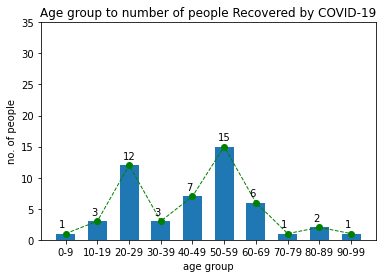

In [152]:
plot(recoveredToAgeGroup.tolist(),'Recovered')

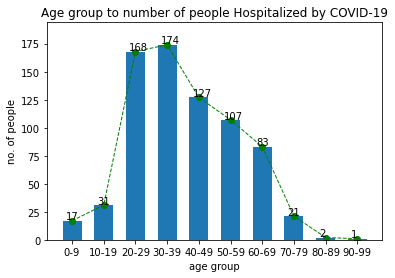

In [153]:
plot(HospitalizedToAgeGroup.tolist(),'Hospitalized')

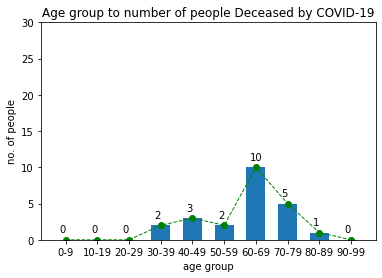

In [154]:
plot(DeceasedToAgeGroup.tolist(),'Deceased')

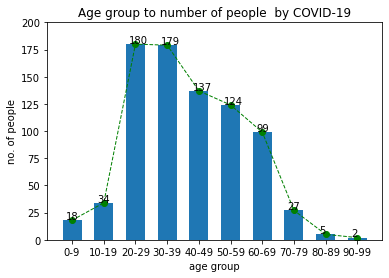

In [155]:
plot(EveryOneToAgeGroup.tolist(),'')

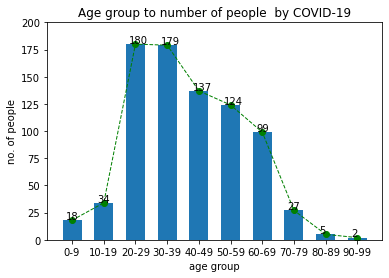

In [282]:
plot(EveryOneToAgeGroup.tolist(),'')

In [184]:
import math
def percentage(x,y):
    percentList = []
    for a,b in zip(x,y):
        percentList.append(round((round((a/b),4) * 100),2))
    return percentList        

In [185]:
percentPeopleRecovered = percentage(recoveredToAgeGroup,EveryOneToAgeGroup)
percentPeopleHospitalized = percentage(HospitalizedToAgeGroup,EveryOneToAgeGroup)
percentPeopleDeceased = percentage(DeceasedToAgeGroup,EveryOneToAgeGroup)

In [186]:
print(percentPeopleRecovered)

[5.56, 8.82, 6.67, 1.68, 5.11, 12.1, 6.06, 3.7, 40.0, 50.0]


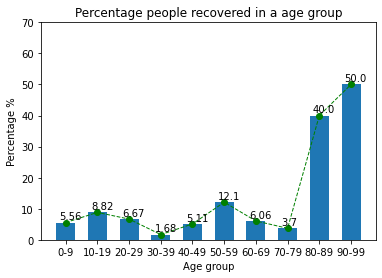

In [188]:
plot(percentPeopleRecovered,'','Age group','Percentage %','Percentage people recovered in a age group')

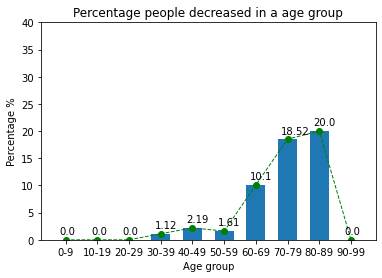

In [189]:
plot(percentPeopleDeceased,'','Age group','Percentage %','Percentage people decreased in a age group')

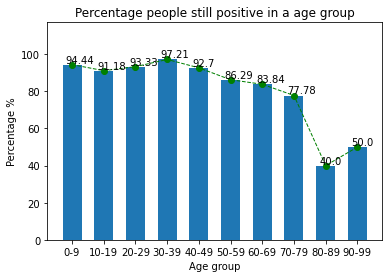

In [191]:
plot(percentPeopleHospitalized,'','Age group','Percentage %','Percentage people still positive in a age group')

In [257]:
import numpy as np

def plotThreeDifferentBarsInAGraph(y,z,k,string, xLabel=None,yLabel=None,title=None):
    x = [i for i in range(0,10)]
    N = 7
    ind = np.arange(N)
    tick_label = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89'] 

    # plotting a bar chart 
    #plt.bar(x, arr, tick_label = tick_label,             width = 0.6)
    
    ax = plt.subplot(111)
    r1 = ax.bar(ind, y, width=0.2, align='center')
    r2 = ax.bar(ind+0.2, z, width=0.2, color='g', align='center',tick_label = tick_label)
    r3 = ax.bar(ind+0.4, k, width=0.2, color='r', align='center')
    ax.legend( (r1[0], r2[0], r3[0]), ('Positive', 'Recovered', 'Decreased') )
    
    plt.ylim(0,max(y) + 20)
    
    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1*h, '%d'%int(h),
                    ha='center', va='bottom')

    autolabel(r1)
    autolabel(r2)
    autolabel(r3)
    
    if xLabel:
        plt.xlabel(xLabel)
    else: 
        plt.xlabel('age group') 
    
    if yLabel:
        plt.ylabel(yLabel)
    else:
        plt.ylabel('no. of people') 

    if title:
        plt.title(title)
    else:
        plt.title('Age group to number of people in India' +string+' by COVID-19') 

    # function to show the plot 
    plt.show() 

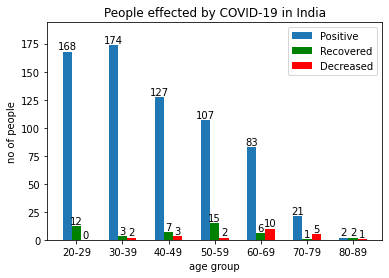

In [246]:
plotThreeDifferentBarsInAGraph(HospitalizedToAgeGroup[2:9],recoveredToAgeGroup[2:9],DeceasedToAgeGroup[2:9],'','age group','no of people','People effected by COVID-19 in India')

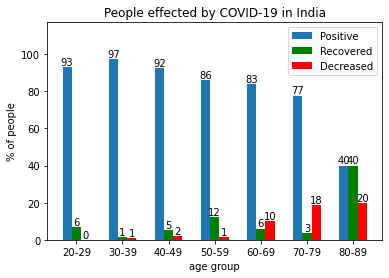

In [258]:
plotThreeDifferentBarsInAGraph(percentPeopleHospitalized[2:9],percentPeopleRecovered[2:9],percentPeopleDeceased[2:9],'','age group','% of people','People effected by COVID-19 in India')

In [301]:
with urllib.request.urlopen("https://api.covid19india.org/raw_data.json") as url:
    raw_data = json.loads(url.read().decode())
len(raw_data['raw_data'])

6814

In [266]:
for element in raw_data['cases_time_series']:
    print(element['date'])

30 January 
31 January 
01 February 
02 February 
03 February 
04 February 
05 February 
06 February 
07 February 
08 February 
09 February 
10 February 
11 February 
12 February 
13 February 
14 February 
15 February 
16 February 
17 February 
18 February 
19 February 
20 February 
21 February 
22 February 
23 February 
24 February 
25 February 
26 February 
27 February 
28 February 
29 February 
01 March 
02 March 
03 March 
04 March 
05 March 
06 March 
07 March 
08 March 
09 March 
10 March 
11 March 
12 March 
13 March 
14 March 
15 March 
16 March 
17 March 
18 March 
19 March 
20 March 
21 March 
22 March 
23 March 
24 March 
25 March 
26 March 
27 March 
28 March 
29 March 
30 March 
31 March 
01 April 
02 April 
03 April 
04 April 


In [276]:
import enum
class Choices(enum.Enum): 
    deceased = "deceased"
    recovered = "recovered"
    hospitalized = "hospitalized"
    total = "total"

In [277]:
print("Recovered".lower() == Choices.recovered.value)

True


In [278]:
import re
pattern = re.compile("([0-9]{2})/([0-9]{2})/([0-9]{4}) ([0-9]{2}):([0-9]{2}):([0-9]{2})")
res = pattern.findall("06/04/2020 18:43:24")
if len(res) > 0:
    print(res[0])

('06', '04', '2020', '18', '43', '24')


In [ ]:
def getPeopleWithSpecificCurrentStatus(data,currentState):
    listWithSpecificCurrentState = []
    for element in data['raw_data']:
        if element['currentstatus'] == 'Recovered':
            listWithSpecificCurrentState.append(element)
    return listWithSpecificCurrentState
    arr = array.array('i',[0]*10)
    pattern = re.compile("([0-9]*)-([0-9]*)")
    for element in data['raw_data']:
        if element['agebracket']:
            res = pattern.findall(element['agebracket'])
            if len(res) > 0:
                avgAge = int((int(res[0][0]) + int(res[0][1]))/2)
                element['agebracket'] = avgAge
            else:
                print(int(element['agebracket']))
                element['agebracket'] = int(element['agebracket'])
    return data   

In [ ]:
def getAccumulativeRecoveryTimeForEachAgeGroup(data):
    accTime = 0
    pattern = re.compile("([0-9][0-9]*)/([0-9][0-9]*)/([0-9][0-9]*)")
    for element in data:
        resDateAnnounced = pattern.findall(element['dateannounced'])
        resDateStatusChanged = pattern.findall(element['statuschangedate'])
        
    

In [296]:
pattern = re.compile("([0-9][0-9]*)/([0-9][0-9]*)/([0-9][0-9]*)")
count=0
for element in raw_data['raw_data']:
    if element['currentstatus'] == 'Recovered':
        count+=1
        resDateAnnounced = pattern.findall(element['dateannounced'])
        resDateStatusChanged = pattern.findall(element['statuschangedate'])
        print(element['dateannounced'] +" "+element['statuschangedate'])
        #if not (len(resDateAnnounced) > 0) or not (len(resDateStatusChanged) > 0):
print(count)
            

30/01/2020 14/02/2020
02/02/2020 14/02/2020
03/02/2020 14/02/2020
02/03/2020 15/03/2020
02/03/2020 02/03/2020
03/03/2020 03/03/2020
04/03/2020 29/03/2020
04/03/2020 29/03/2020
04/03/2020 29/03/2020
04/03/2020 29/03/2020
04/03/2020 29/03/2020
04/03/2020 29/03/2020
04/03/2020 29/03/2020
04/03/2020 29/03/2020
04/03/2020 29/03/2020
04/03/2020 29/03/2020
04/03/2020 29/03/2020
04/03/2020 29/03/2020
04/03/2020 04/03/2020
04/03/2020 15/03/2020
04/03/2020 15/03/2020
04/03/2020 15/03/2020
04/03/2020 15/03/2020
05/03/2020 05/03/2020
06/03/2020 15/03/2020
07/03/2020 07/03/2020
08/03/2020 27/03/2020
08/03/2020 29/03/2020
08/03/2020 29/03/2020
08/03/2020 29/03/2020
08/03/2020 29/03/2020
09/03/2020 27/03/2020
09/03/2020 26/03/2020
09/03/2020 25/03/2020
09/03/2020 25/03/2020
09/03/2020 20/03/2020
10/03/2020 03/04/2020
10/03/2020 24/03/2020
10/03/2020 27/03/2020
10/03/2020 24/03/2020
10/03/2020 26/03/2020
10/03/2020 26/03/2020
10/03/2020 31/03/2020
10/03/2020 31/03/2020
10/03/2020 28/03/2020
10/03/2020

In [305]:
a = array.array('i',[1]*10)
b = array.array('i',[2]*10)

for x,y in zip(a,b):
    print("a:{} b:{}".format(x,y))

a:1 b:2
a:1 b:2
a:1 b:2
a:1 b:2
a:1 b:2
a:1 b:2
a:1 b:2
a:1 b:2
a:1 b:2
a:1 b:2
